<a href="https://colab.research.google.com/github/PedroFrancholi/Analise_de_Dados_e_Tomada_de_Decisoes/blob/main/Titanic_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
treino = pd.read_csv('train.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
treino.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [7]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [8]:
teste = pd.read_csv('test.csv')
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [9]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [11]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [12]:
treino.shape

(891, 12)

In [13]:
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [14]:
treino = treino.drop(['Name','Ticket','Cabin'], axis=1)

In [15]:
teste = teste.drop(['Name','Ticket','Cabin'], axis=1)

In [16]:
 treino.Age.mean()

29.69911764705882

In [17]:
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()

In [18]:
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [19]:
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
treino.Embarked.mode()[0]

'S'

In [21]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

In [22]:
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

In [23]:
treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [24]:
teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

Foram tratados todos os valores nulos para melhor apuração das informações.

In [25]:
col_treino_nr = treino.columns[treino.dtypes !='object']
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
treino_nr = treino.loc[:,col_treino_nr]

In [27]:
col_teste_nr = teste.columns[teste.dtypes !='object']
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [28]:
teste_nr = teste.loc[:,col_teste_nr]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = treino_nr.drop(['PassengerId','Survived'], axis=1)
y = treino.Survived

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

Árvore de classificação

In [32]:
from sklearn import tree

In [33]:
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [34]:
clf_ac= clf_ac.fit(X_train,y_train)

In [35]:
y_pred_ac = clf_ac.predict(X_val)

Neighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [38]:
clf_knn= clf_knn.fit(X_train,y_train)

In [39]:
y_pred_knn = clf_knn.predict(X_val)

Regressão Linear

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
clf_rl = LogisticRegression(random_state=42)

In [86]:
clf_rl= clf_rl.fit(X_train,y_train)

In [87]:
y_pred_rl = clf_rl.predict(X_val)

Acurácia

In [88]:
from sklearn.metrics import accuracy_score

In [112]:
##Árvore
accuracy_score(y_val, y_pred_ac)

0.6169491525423729

In [113]:
##Knn
accuracy_score(y_val, y_pred_knn)

0.6610169491525424

In [114]:
##Regrssão Logísitica
accuracy_score(y_val, y_pred_rl)

0.7254237288135593

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
##Árvore
confusion_matrix(y_val, y_pred_ac)

array([[125,  50],
       [ 63,  57]])

In [94]:
##Knn
confusion_matrix(y_val, y_pred_knn)

array([[133,  42],
       [ 58,  62]])

In [95]:
##Regrssão Logísitica
confusion_matrix(y_val, y_pred_rl)

array([[156,  19],
       [ 62,  58]])

In [96]:
X_train

,Pclass,Age,SibSp,Parch,Fare
6,1,54.000000,0,0,51.8625
718,3,29.699118,0,0,15.5000
685,2,25.000000,1,2,41.5792
73,3,26.000000,1,0,14.4542
882,3,22.000000,0,0,10.5167
...,...,...,...,...,...
106,3,21.000000,0,0,7.6500
270,1,29.699118,0,0,31.0000
860,3,41.000000,2,0,14.1083
435,1,14.000000,1,2,120.0000


In [97]:
teste_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [98]:
X_teste = teste_nr.drop("PassengerId",axis=1)

In [99]:
y_pred = clf_rl.predict(X_teste)

In [56]:
teste['Survived'] = y_pred

In [57]:
base_envio = teste[['PassengerId','Survived']]

In [58]:
base_envio.to_csv('resultados.csv',index=False)

In [59]:
treino.columns[treino.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [60]:
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [62]:
treino.MaleCheck.value_counts()

1    577
0    314
Name: MaleCheck, dtype: int64

In [63]:
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [64]:
teste.MaleCheck.value_counts()

1    266
0    152
Name: MaleCheck, dtype: int64

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

In [67]:
ohe = ohe.fit(treino[['Embarked']])

In [68]:
ohe.transform(treino[['Embarked']]).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int32)

In [69]:
ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1


In [70]:
treino = pd.concat([treino,ohe_df],axis=1)

In [71]:
treino[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             646
C         1           0           0             168
Q         0           1           0              77
dtype: int64

In [72]:
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

In [73]:
teste = pd.concat([teste,ohe_df],axis=1)

In [74]:
teste[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0           0           1             270
C         1           0           0             102
Q         0           1           0              46
dtype: int64

In [75]:
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)

In [76]:
treino.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [77]:
X_train.head(5)

,Pclass,Age,SibSp,Parch,Fare
6,1,54.000000,0,0,51.8625
718,3,29.699118,0,0,15.5000
685,2,25.000000,1,2,41.5792
73,3,26.000000,1,0,14.4542
882,3,22.000000,0,0,10.5167


In [78]:
teste = teste.drop(['Survived'],axis=1)

In [79]:
teste.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0


In [80]:
X_teste = teste.drop('PassengerId',axis=1)

In [100]:
y_pred = clf_rl.predict(X_teste)

In [101]:
teste['Survived'] = y_pred

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1


In [116]:
as_df = pd.DataFrame({
    'modelos': ['arvore','knn','reg. log'],
    'inicial': [as_ac,as_knn,as_rl]
})

as_df

,modelos,inicial
0,arvore,0.616949
1,knn,0.661017
2,reg. log,0.725424


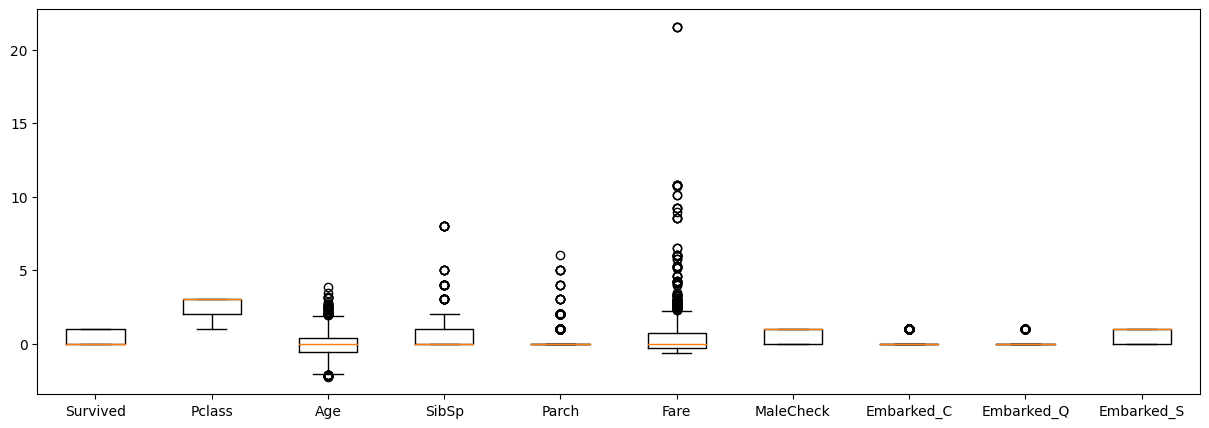

In [124]:
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)

plt.show()

In [118]:
from sklearn.preprocessing import RobustScaler

In [119]:
transformer = RobustScaler().fit(treino[['Age','Fare']])

In [120]:
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

In [121]:
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

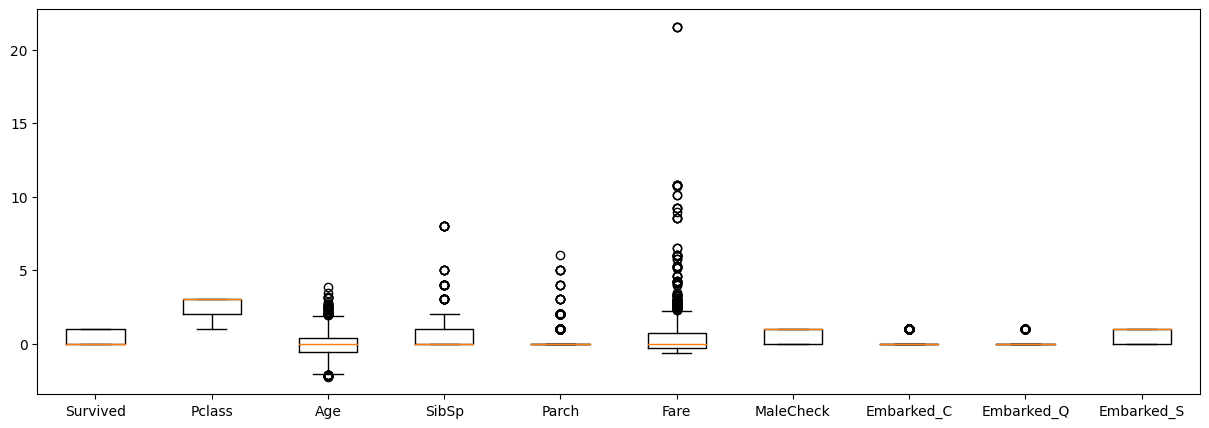

In [122]:
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)

plt.show()

In [126]:
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']
SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [127]:
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']
Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


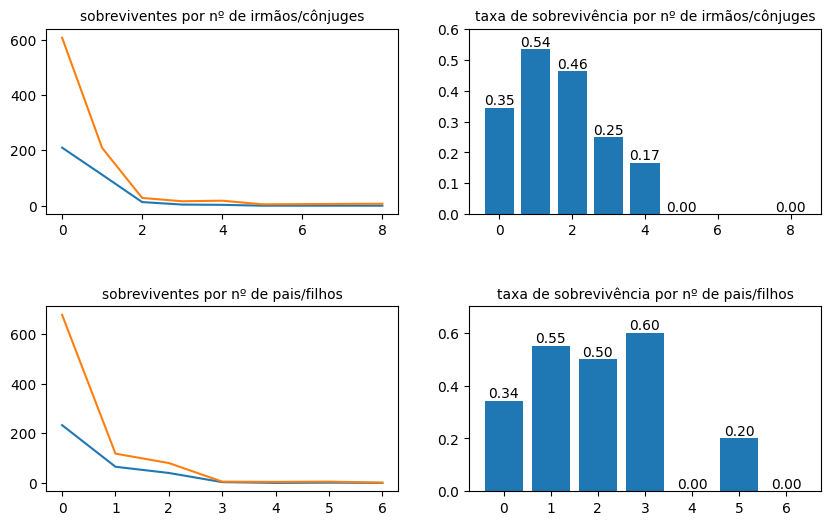

In [128]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.tx_sobrev)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [131]:
def sozinho(a,b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0

In [132]:
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [133]:
treino.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [134]:
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [135]:
treino['Familiares'] = treino.SibSp + treino.Parch

In [136]:
teste['Familiares'] = treino.SibSp + treino.Parch

In [137]:
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
Familiares_df.columns = ['Familiares','sobrev','total','tx_sobrev']
Familiares_df

,Familiares,sobrev,total,tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


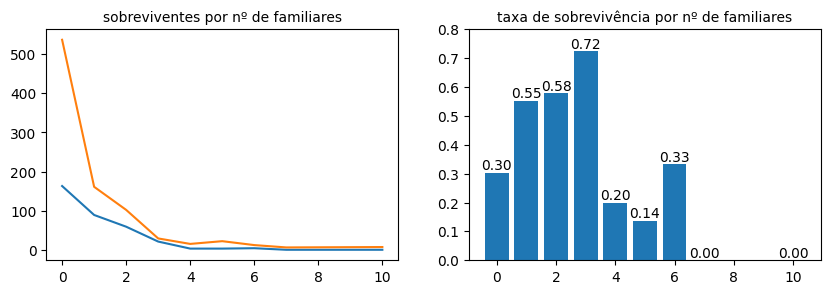

In [138]:
fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)
ax[0].plot(Familiares_df.Familiares, Familiares_df.total)
ax[0].set_title('sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.tx_sobrev)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

In [146]:
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1,0


<Axes: xlabel='Pclass', ylabel='Density'>

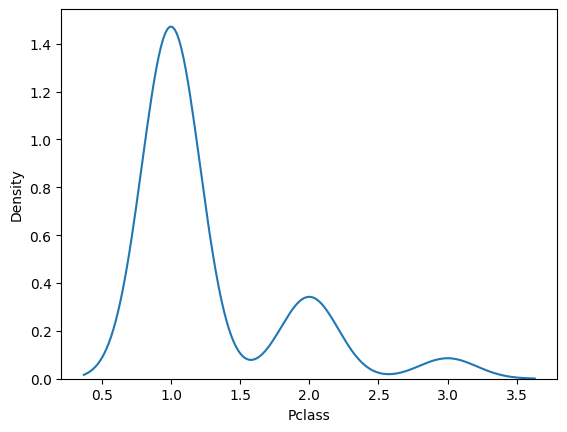

In [162]:
sns.kdeplot(data=teste,x=teste.loc[teste['Survived']==1,"Pclass"])

<Axes: xlabel='Age', ylabel='Density'>

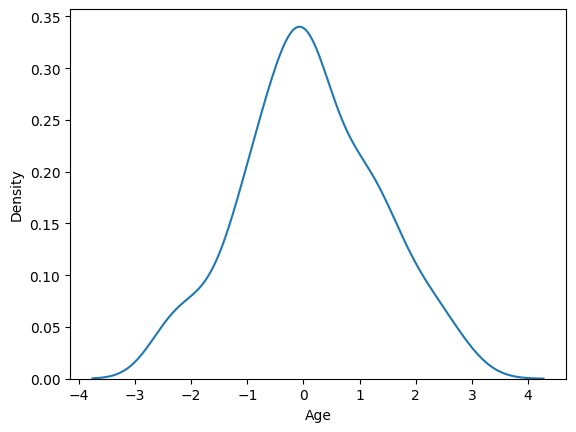

In [163]:
sns.kdeplot(data=teste,x=teste.loc[teste['Survived']==1,"Age"])

<Axes: xlabel='Familiares', ylabel='Density'>

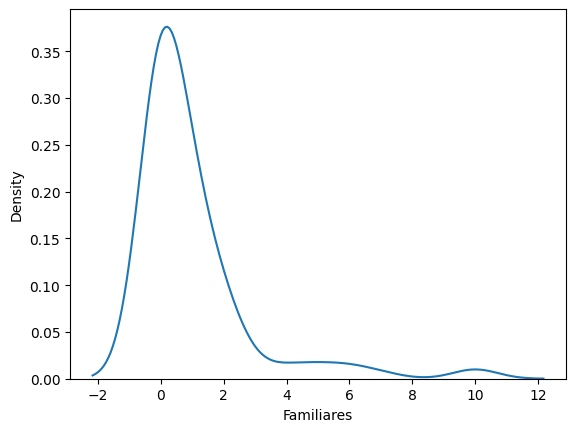

In [164]:
sns.kdeplot(data=teste,x=teste.loc[teste['Survived']==1,"Familiares"])

<Axes: xlabel='MaleCheck', ylabel='Density'>

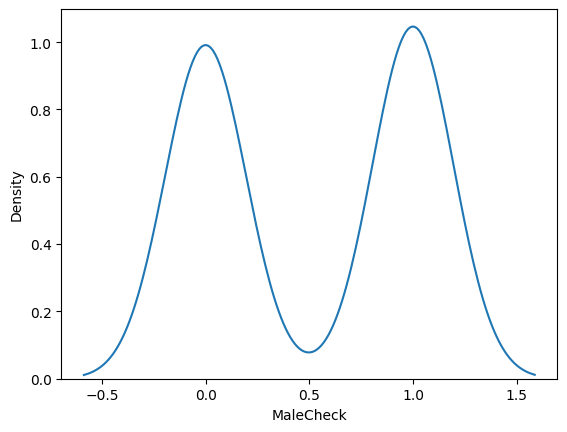

In [165]:
sns.kdeplot(data=teste,x=teste.loc[teste['Survived']==1,"MaleCheck"])

<Axes: xlabel='Pclass', ylabel='count'>

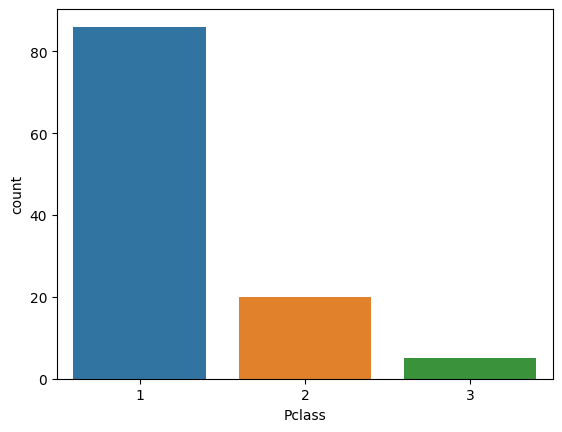

In [157]:
sns.countplot(x=teste.loc[teste['Survived']==1,"Pclass"])

<Axes: xlabel='Age', ylabel='count'>

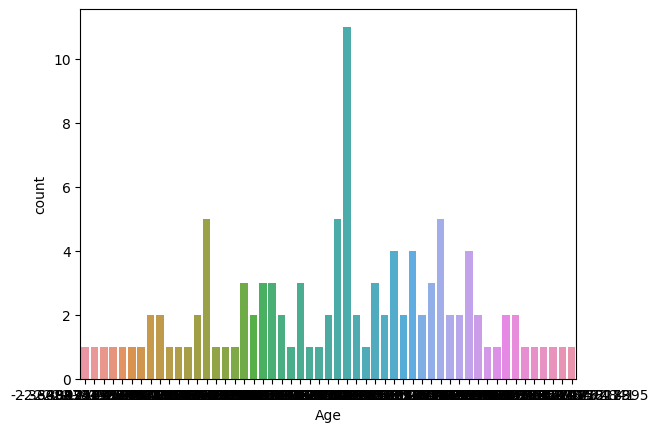

In [158]:
sns.countplot(x=teste.loc[teste['Survived']==1,"Age"])

<Axes: xlabel='MaleCheck', ylabel='count'>

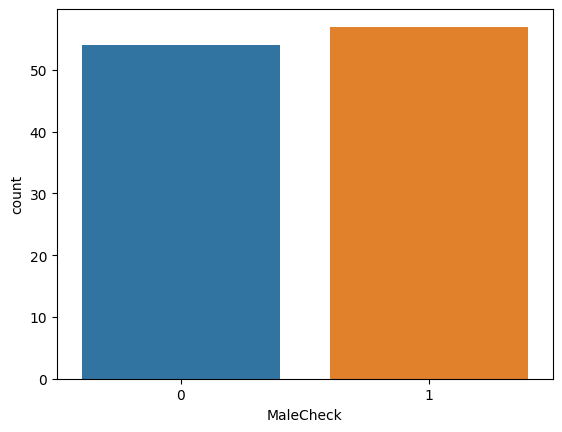

In [160]:
sns.countplot(x=teste.loc[teste['Survived']==1,"MaleCheck"])

<Axes: >

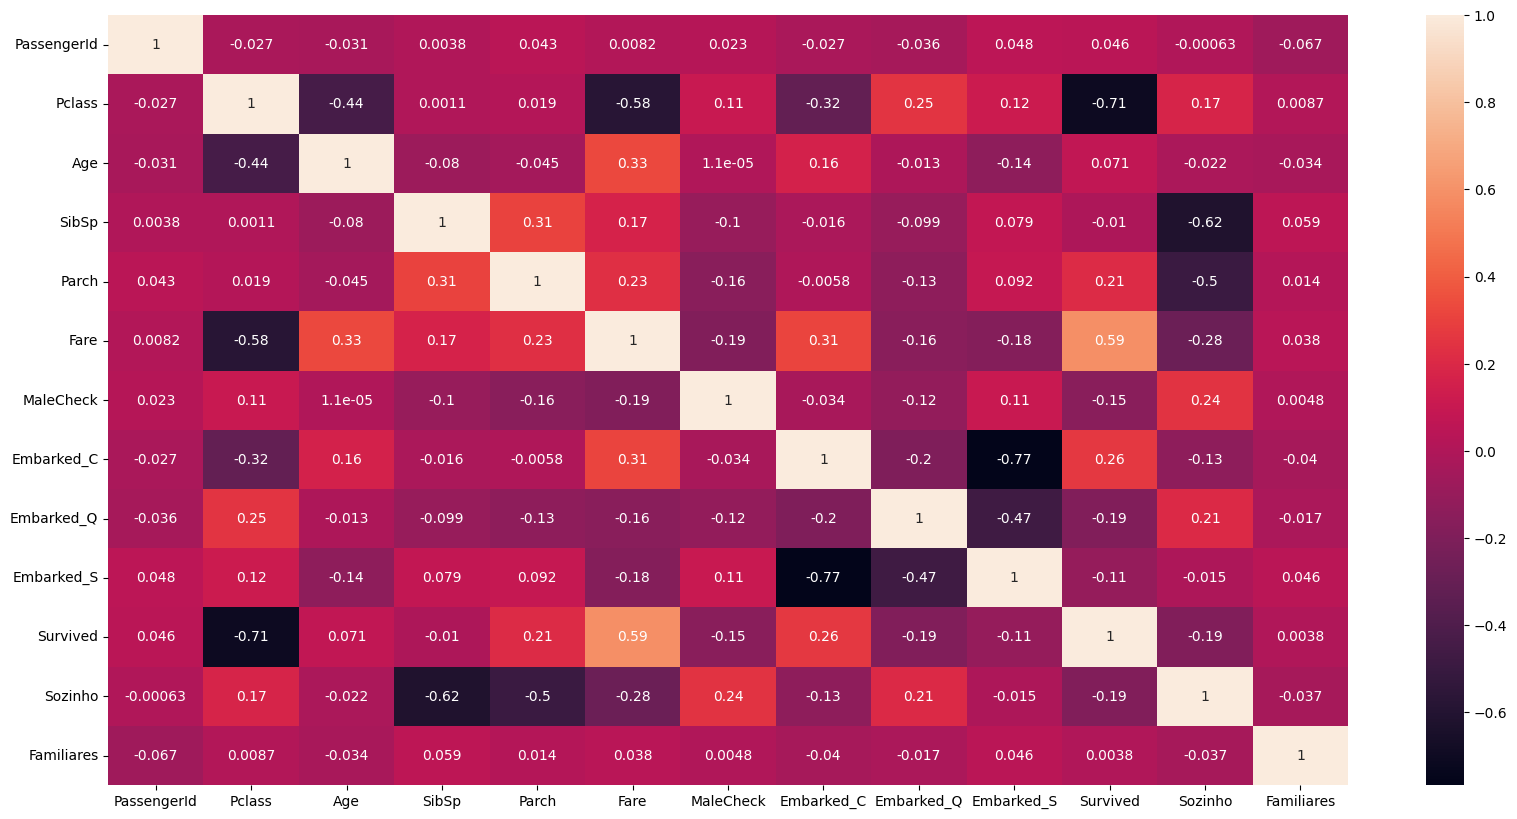

In [151]:
plt.figure(figsize=(20,10))
sns.heatmap(teste.corr(), annot=True)

**Analisando os dados finais, de acordo com a correlação dos dados, as pessoas do sexo feminino possuem maior taxa de sobrevivência. Também temos a classe em que o passageiro embarcou, a classe que possui maior número de sobreviventes foi a Primeira Classe e o menor número da Terceira Classe, isso pode estar condizente com a segurança de cada classe. Pessoas de média idade, entre 35-40 anos foram as que mais sobreviveram, isso se dá ao fato de possuirem uma boa qualidade de vida e também por possuirem experiência, mantendo a calma em uma situação de apuros. As pessoas que possuiam um irmão ou cônjuge é maior que a taxa de sobrevivência dos demais, isso ocorre pelo fato de ter alguém ajudando e zelando pela vida do outro. Os passageiros que possuem três familiares foram os que mais se salvaram, pelo fato de terem ajuda de forma mais rápida e fácil.**